# Are Fandango's Ratings Inflated?

In October 2015, data journalist Walt Hickey published an <a href="https://fivethirtyeight.com/features/fandango-movies-ratings/">article</a> based on data he collected from Fandango's website and found evidence that strongly suggests Fandango inflates its review scores. He noted that this inflation is caused by the following factors:
- Fandango rounds all of accumulated ratings up to the nearest half star, and over 8% of the time rounds a review up an entire half star (ex. 4.5 rating becomes 5.0 rating)
- Even after accounting for Fandango's unique rounding policy, Fandango rates movies much higher than other movie review sites (such as Rotten Tomatoes, Metacritic, and IMDB), as exemplified by 98% of Fandango's reviews being at least 3 stars

Fandango employees responded to Hickey stating that their rounding policy was the result of a bug and claimed to fix the error, however, since Fandango has removed the pre-rounding rating from their HTML (how Hickey originally took note of the rounding policty), this claim is difficult to verify.

In this project, I will be analyzing data from <a href="https://www.fandango.com/">Fandango's</a> website about movies released in 2016 in order to verify whether the company has fixed the issue. While I will not address the two factors directly, I will attempt to determine whether Fandango's ratings have decreased significantly since Hickey's research was published at the end of 2015.

## 1. Preparing the Data for Analysis

In this section, I will mainly focus on cleaning the data so that it can be more readily analyzed in later sections. First, I will import the Python libraries that I will use throughout this project.

In [1]:
from numpy import arange, insert
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

### a) First Look at the Dataset

Next, I will read in the two datasets that I will be examining throughout this project. Both datasets were collected from GitHub.
- The first dataset, *fandango_score_comparison.csv*, was created by Hickey and used for his findings
- The second dataset, *movie_ratings_16_17.csv*, was created by DataQuest for a practice project

In [2]:
fandango_15 = pd.read_csv("fandango_score_comparison.csv")
fandango_16 = pd.read_csv("movie_ratings_16_17.csv")

In [3]:
fandango_15.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
fandango_16.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Both dataset contain many columns that will not be pertinent to my analysis. After examining the README files of both datasets, I've decided on narrowing my analysis to focus on the columns below.

In [5]:
fandango_15 = fandango_15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_16 = fandango_16[['movie', 'year', 'fandango']]

In [6]:
fandango_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [7]:
fandango_16.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


With less columns in each table, these datasets will be relatively easy to analyze.

### b) Changing the Goal of my Analysis

My original goal was to determine whether Fandango had corrected its rating system after Hickey's findings. Thus, my first dataset should represent a population that includes all movie ratings Fandango published before Hickey's analysis and my second dataset should represent all movie ratings Fandango published after Hickey's analysis. However, the first dataset has Fandango ratings for movies released in 2014 and 2015, and the second dataset has Fandango ratings for movies released in 2016 and 2017. Therefore, my datasets are not representative of my target populations.

Before analyzing any further, I must choose between two different choices. I could collect new data that is more representative of my target population. Alternatively, I could create a new goal that is more representative of the datasets I am working with. I will choose the second option and create a new goal.

My new goal will be to determine whether there's any difference between Fandango's ratings for movies in 2015 and Fandango's ratings for movies in 2016. Since Hickey published his findings at the end of 2015, this should be a fairly good proxy for my initial goal.

### c) Ensuring the Datasets Represent Popular Movies and the Appropriate Year

In this section, I will edit the datasets to handle the following two problems:
- The first dataset should only contain movies released in 2015 and the second dataset should only contain movies released in 2016
- In order to reduce any errors caused by a small sample size, all of the movies in the datasets should have a minimum of 30 reviews

First I will look at each of the datasets and find out how many movies were published in each year.

Although the fandango_15 dataset doesn't have a column indicating which year it was published, the title of each movie contains the year in parentheses, as seen below.

In [8]:
fandango_15["FILM"].head()

0    Avengers: Age of Ultron (2015)
1                 Cinderella (2015)
2                    Ant-Man (2015)
3            Do You Believe? (2015)
4     Hot Tub Time Machine 2 (2015)
Name: FILM, dtype: object

Therefore, I can select the portion of each film's title that contains the year, convert that string into an integer, and create a new column that contains the movie's release year.

In [9]:
fandango_15["year"] = fandango_15["FILM"].str[-5:-1].astype(int)
fandango_15["year"].value_counts()

2015    129
2014     17
Name: year, dtype: int64

The vast majority of films in this dataset were released in 2015. Next, I will take a look at the release year for the movies in the fandango_16 dataset.

In [10]:
fandango_16["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

Here the situation is very similar, as the vast majority of films were released in a single year. Since I only want data entries from 2015 and 2016 respectively, I will select only movies in fandango_15 that were released in 2015 as well as movies from fandango_16 that were released in 2016.

In [11]:
fandango_15 = fandango_15[fandango_15["year"] == 2015]
fandango_16 = fandango_16[fandango_16["year"] == 2016]

Next, I will make sure that all films in each dataset have at least 30 reviews, which will ensure the datasets are less prone to random error.

In [12]:
fandango_15[fandango_15["Fandango_votes"] < 30]

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year


Because Hickey already removed all movies that contained less than 30 reviews from his dataset, this result is expected. However, since the fandango_16 dataset does not display the number of reviews, determining the number of reviews for each movie in the fandango_16 dataset will be more difficult. I will take a random sample of 20 movies from to approximate the percentage of movies that have at least 30 reviews.

**Disclaimer:** Fandango has removed their rating system from their site, so I will be unable to determine which movies have at least 30 Fandango reviews. However, since they have replaced their star system with Rotten Tomatoes fresh/rotten system, I will use the number of Rotten Tomatoes user reviews as a proxy. Since Rotten Tomatoes has a much larger number of total reviews than Fandango ever did, if a movie has at least 1000 Rotten Tomatoes user reviews, I will consider the number of users large enough to remove an random error.

Below is my random sample of 20 movies from my fandango_16 dataset.

In [13]:
fandango_16.sample(20, random_state = 1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


The table below indicates the number of Rotten Tomato user reviews for each of the movies listed above.

| Movie                              | Number of Reviews |
|:-----------------------------------|:-----------------:|
| Collide                            | 3,916             |
| Ice Age: Collision Course          | 33,061            |
| Now You See Me 2                   | 67,097            |
| The Disappointments Room           | 3,424             |
| Kubo and the Two Strings           | 35,493            |
| Pride and Prejudice and Zombies    | 28,241            |
| Deadpool                           | 187,575           |
| Money Monster                      | 23,645            |
| War Dogs                           | 29,224            |
| Miracles from Heaven               | 22,116            |
| Rogue One: A Star Wars Story       | 104,721           |
| Batman V Superman: Dawn of Justice | 234,950           |
| The Girl on the Train              | 34,465            |
| Whiskey Tango Foxtrot              | 22,430            |
| Imperium                           | 8,676             |
| Pete's Dragon                      | 37,163            |
| Eddie the Eagle                    | 22,888            |
| A Monster Calls                    | 25,286            |
| Fifty Shades of Black              | 11,155            |

Since 100% of the movies in this sample have at least 1,000 user reviews (the lowest number of reviews is 3,424), I will consider this dataset reliable enough to continue my analysis.

## 2. Analyzing the Results

Now that my dataset is finally clean, I will begin my analysis via the following steps:
- Create a plot containing a kernal density estimations of the Fandango ratings for each dataset
- Compare the mean, median, and mode Fandango ratings for each dataset

### a) Kernal Density Estimations

The kernal density estimations on the plot I created below will estimate the distribution of Fandango ratings for each of the datasets. In addition to the KDE's themselves, I will also create two vertical lines indicating the mean for each of the datasets.

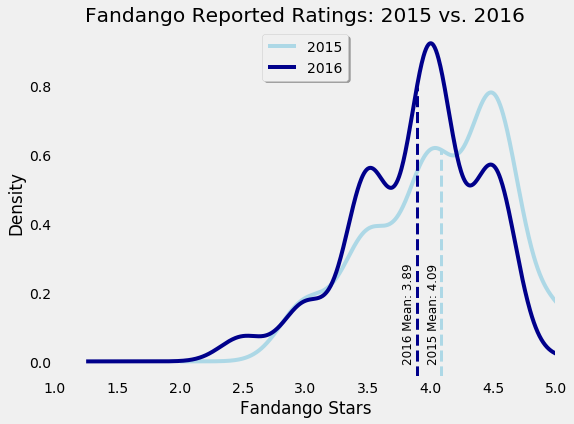

In [14]:
plt.style.use('fivethirtyeight') # Changed the style of the graph

# Details about the KDE plots
fandango_15['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,6), c="lightblue")
fandango_16['fandango'].plot.kde(label = '2016', legend = True, figsize = (8,6), c="darkblue")

plt.title("Fandango Reported Ratings: 2015 vs. 2016")
plt.xlabel("Fandango Stars")
plt.xlim(1,5)

mean_15 = fandango_15['Fandango_Stars'].mean()
mean_16 = fandango_16['fandango'].mean()

# Creates a dashed line indicating the position for each datasets' mean
plt.axvline(mean_15, c="lightblue", ymax=0.65, lw=3, linestyle="--")
plt.axvline(mean_16, c="darkblue", ymax=0.83, lw=3, linestyle="--")

# Places text indicating each of the datasets' means on each of the lines
plt.text(round(mean_15, 2) - 0.12, 0, "2015 Mean: {}".format(round(mean_15, 2)), rotation="vertical", fontsize=12)
plt.text(round(mean_16, 2) - 0.12, 0, "2016 Mean: {}".format(round(mean_16, 2)), rotation="vertical", fontsize=12)

plt.legend(loc="upper center", shadow=True)
plt.xticks(arange(1, 5.1, 0.5))
plt.grid(False) # Removes gridlines

plt.show()

There are several interesting findings that are displayed on the KDE plots displayed above:
- While the lowest Fandango rating for 2015 movies is 3 stars, there appear to be a few 2016 movies with Fandango ratings that are less than 3 stars
- The most common Fandango score for 2015 movies is 4.5 stars, while it is 4.0 stars for 2016 movies
- The average Fandango rating for 2015 movies is 0.2 points more than the average Fandango rating for 2016 movies
- It is over twice as likely that a 2015 movies is rated 5.0 stars than it is that a 2016 movie is rated 5.0 stars

Based on the KDE's, it appears as though Fandango has significantly reduced its scores since Hickley's findings. 

### b) Comparing Each Distribution's Mean, Median, and Mode

In this subsection, I will  do the following:
- Create a bar chart that indicates the frequency of each Fandango rating in both the fandango_15 and fandango_16 datasets
- Compare both datasets' mean, median, and mode to see if they indicate anything interesting

Before I'm able to create the bar chart described above, I will need to create two lists. The first will list the percentage frequencies of each Fandango rating in the fandango_15 dataset, and the second will list the percentage frequencies of each Fandango rating in the fandango_16 dataset.

In [15]:
array_15 = list(round(fandango_15['Fandango_Stars'].value_counts(normalize=True).sort_index()*100, 2).values)
array_15.insert(0, 0.00) # adds a 0.0 to the front of the array (will represent the 2.5 value, which is empty)
array_16 = list(round(fandango_16['fandango'].value_counts(normalize=True).sort_index()*100, 2).values)

Next, I will use the lists above to create the desired bar chart.

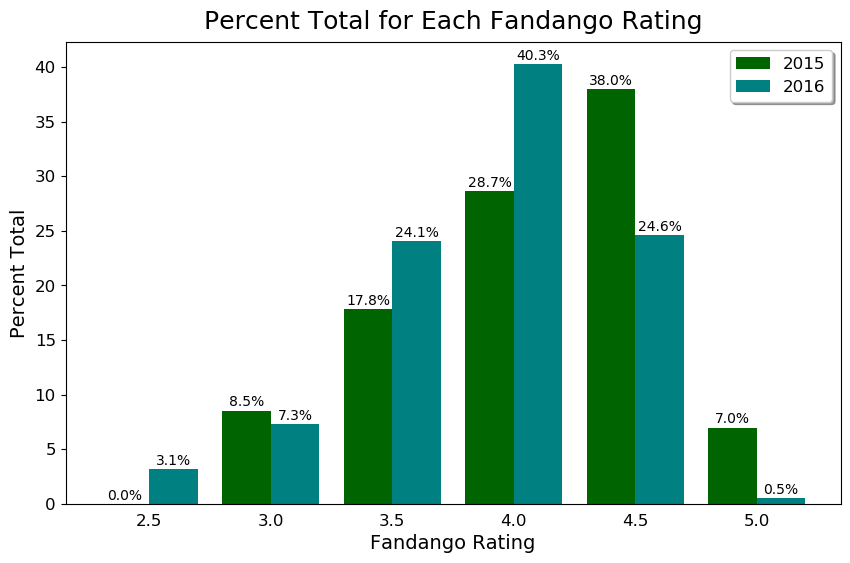

In [16]:
plt.style.use('default') # Returns the style to default (was set to "fivethirtyeight" earlier)

# Will create a percentage of total for each of the bars (located right above each bar)
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}%'.format(round(height, 1)), # Creates the text for the graph
                    xy=(bar.get_x() + bar.get_width() / 2, height), # XY position for placing text
                    xytext=(0, 1),  # Places the percentage 1 points vertically above the bars themselves
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

x = arange(6) # Aids in positioning of each individual bar
width = 0.4 # Determines the width of each individual bar

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

# Details pertaining to the bars
bar_15 = ax.bar(x - width/2, array_15, width, label="2015", color="DarkGreen")
bar_16 = ax.bar(x + width/2, array_16, width, label="2016", color="teal")
                
ax.set_ylabel('Percent Total', fontsize=14)
ax.set_xlabel('Fandango Rating', fontsize=14)
ax.set_title("Percent Total for Each Fandango Rating", fontsize=18, y=1.01)
ax.set_xticks(x)
ax.set_xticklabels([2.5, 3.0, 3.5, 4.0, 4.5, 5.0], fontsize=12)
ax.set_yticklabels([*range(0, 45, 5)], fontsize=12)
ax.tick_params(axis="both", which="both", top=False, bottom=False, labelbottom=True)

ax.legend(fontsize=12, shadow=True)

autolabel(bar_15)
autolabel(bar_16)

plt.show()

Based on the bar charts above, I can determine the following about the dataset:
- The fandango_15 data does not have any movies rated 2.5
- Ratings for 4.5 and 5.0 are much more common in the fandango_15 dataset than they are in the fandango_16 dataset
- Ratings for 3.5 and 4.0 are much more common in the fandango_16 dataset than they are in the fandango_15 dataset

Next, I will look at the mean, median, and mode of each dataset and compare them in a table.

In [17]:
mean_15 = round(fandango_15['Fandango_Stars'].mean(), 2)
median_15 = round(fandango_15['Fandango_Stars'].median(), 2)
mode_15 = round(fandango_15['Fandango_Stars'].mode()[0], 2)

In [18]:
mean_16 = round(fandango_16['fandango'].mean(), 2)
median_16 = round(fandango_16['fandango'].median(), 2)
mode_16 = round(fandango_16['fandango'].mode()[0], 2)

In [19]:
table = pd.DataFrame()
table['2015'] = [mean_15, median_15, mode_15]
table['2016'] = [mean_16, median_16, mode_16]
table.index = ['Mean', 'Median', 'Mode']
table

,2015,2016
Mean,4.09,3.89
Median,4.00,4.00
Mode,4.50,4.00


As noted before, the mean of the fandango_15 dataset is 0.2 points higher than that of the fandango_16 dataset. This implies one of the following:
- Fandango modified its rating system to that it didn't rate aggregate reviews as high as before
- Users rated movies from 2015 higher than they rated those of 2016

The other two summary statistics are much less helpful.

## 3. Results

Although it's quite difficult to determine whether Fandango updated its rating system after Hickey's article, the fact that its average ratings are lower than they used to be is a positive sign. However, even in 2016, there was not a single movie that was rated below 2.5, which is surprising. Therefore, it appears as though Rotten Tomatoes is still attempting to inflate movie rating scores. Considering Fandango sells movie tickets, it has a vested interest in publishing higher scores for all movies. 